In [1]:
from nilearn.glm.contrasts import compute_fixed_effects

import glob, os
import matplotlib.pyplot as plt
from nilearn.image import mean_img, load_img
from nilearn.plotting import plot_stat_map, plot_anat, plot_img
from nilearn.glm import threshold_stats_img

import pandas as pd
import numpy as np

plt.ion()

/home/kbond/.local/lib/python3.7/site-packages/nilearn/glm/__init__.py:56: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  'It may change in any future release of Nilearn.', FutureWarning)


In [2]:
file_dir = ('/lab_data/coaxlab/Projects/loki_1/stat_maps/derivatives/trialwise_response/sub-{}/ses-{}/func/')
file_pattern = ('*sub-{}*ses-{}*run-{}*.nii.gz')
events_path = ('/user_data/kbond/loki_1/data/BOLD/sub*{}/fmriprep/sub*{}/ses*{}/func/*run{}*motor_events.tsv')

In [3]:
stat_type = 'z_maps'

LR_dir = 'LR_coded'

stat_path = os.path.join(file_dir, stat_type, file_pattern)
new_coded_path = os.path.join(file_dir, stat_type, LR_dir)

print(stat_path, new_coded_path)

/lab_data/coaxlab/Projects/loki_1/stat_maps/derivatives/trialwise_response/sub-{}/ses-{}/func/z_maps/*sub-{}*ses-{}*run-{}*.nii.gz /lab_data/coaxlab/Projects/loki_1/stat_maps/derivatives/trialwise_response/sub-{}/ses-{}/func/z_maps/LR_coded


In [4]:
subjects=[790, 811, 813, 860]; sessions = range(2,11); runs = range(0,5); n_trials_per_run = 60; n_sessions = 9

# Compute fixed effects over sessions for each subject

https://nilearn.github.io/glm/second_level_model.html

In [5]:
left_responses = os.path.join(new_coded_path, '*_L.nii.gz')
right_responses = os.path.join(new_coded_path, '*_R.nii.gz')

In [6]:
left_fns_790 = glob.glob(left_responses.format('790', '*'))

left_imgs_790 = [load_img(img) for img in left_fns_790]


right_fns_790 = glob.glob(right_responses.format('790', '*'))

right_imgs_790 = [load_img(img) for img in right_fns_790]

In [7]:
left_fns_811 = glob.glob(left_responses.format('811', '*'))

left_imgs_811 = [load_img(img) for img in left_fns_811]


right_fns_811 = glob.glob(right_responses.format('811', '*'))

right_imgs_811 = [load_img(img) for img in right_fns_811]

In [8]:
left_fns_813 = glob.glob(left_responses.format('813', '*'))

left_imgs_813 = [load_img(img) for img in left_fns_813]


right_fns_813 = glob.glob(right_responses.format('813', '*'))

right_imgs_813 = [load_img(img) for img in right_fns_813]

In [9]:
left_fns_860 = glob.glob(left_responses.format('860', '*'))

left_imgs_860 = [load_img(img) for img in left_fns_860]


right_fns_860 = glob.glob(right_responses.format('860', '*'))

right_imgs_860 = [load_img(img) for img in right_fns_860]

In [11]:
second_level_input_790 = left_imgs_790 + right_imgs_790
condition_effect_790 = np.hstack(([1] * len(left_imgs_790), [-1] * len(right_imgs_790)))

design_matrix_790 = pd.DataFrame(
    np.hstack((condition_effect_790[:, np.newaxis])),
    columns=['left vs right'])

In [12]:
second_level_input_811 = left_imgs_811 + right_imgs_811
condition_effect_811 = np.hstack(([1] * len(left_imgs_811), [-1] * len(right_imgs_811)))

design_matrix_811 = pd.DataFrame(
    np.hstack((condition_effect_811[:, np.newaxis])),
    columns=['left vs right'])

In [13]:
second_level_input_813 = left_imgs_813 + right_imgs_813
condition_effect_813 = np.hstack(([1] * len(left_imgs_813), [-1] * len(right_imgs_813)))

design_matrix_813 = pd.DataFrame(
    np.hstack((condition_effect_813[:, np.newaxis])),
    columns=['left vs right'])

In [14]:
second_level_input_860 = left_imgs_860 + right_imgs_860
condition_effect_860 = np.hstack(([1] * len(left_imgs_860), [-1] * len(right_imgs_860)))

design_matrix_860 = pd.DataFrame(
    np.hstack((condition_effect_860[:, np.newaxis])),
    columns=['left vs right'])

In [15]:
# session_effect = np.vstack((np.eye(n_sessions), np.eye(n_sessions)))
# sessions = ['session%02d' % i for i in range(1, n_sessions + 1)]

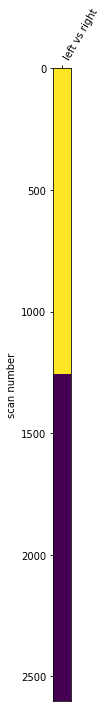

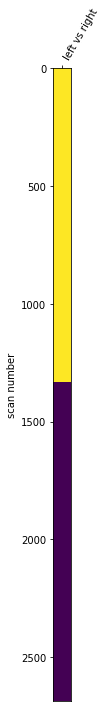

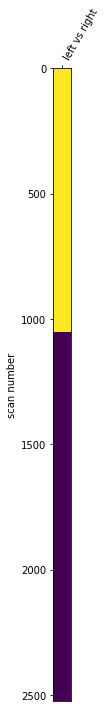

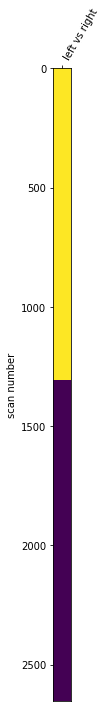

In [16]:
from nilearn.plotting import plot_design_matrix
%matplotlib inline

plot_design_matrix(design_matrix_790); plot_design_matrix(design_matrix_811); plot_design_matrix(design_matrix_813);
plot_design_matrix(design_matrix_860)

In [17]:
from nilearn.glm.second_level import SecondLevelModel
second_level_model_790 = SecondLevelModel().fit(second_level_input_790, design_matrix=design_matrix_790)

In [18]:
second_level_model_811 = SecondLevelModel().fit(second_level_input_811, design_matrix=design_matrix_811)

In [19]:
second_level_model_813 = SecondLevelModel().fit(second_level_input_813, design_matrix=design_matrix_813)

In [20]:
second_level_model_860 = SecondLevelModel().fit(second_level_input_860, design_matrix=design_matrix_860)

In [21]:
z_map_790 = second_level_model_790.compute_contrast('left vs right',
                                            output_type='z_score')

In [22]:
z_map_811 = second_level_model_811.compute_contrast('left vs right',
                                            output_type='z_score')

In [24]:
# todo: fov issue?

# z_map_813 = second_level_model_813.compute_contrast('left vs right',
#                                             output_type='z_score')

In [25]:
z_map_860 = second_level_model_860.compute_contrast('left vs right',
                                            output_type='z_score')

In [33]:
epi_file_790 = glob.glob('/lab_data/coaxlab/Projects/loki_1/fmriprep_BOLD_data/sub-790/ses-02/func/*run-01*space-T1w_desc-preproc_bold.nii.gz')


epi_img_790 = load_img(epi_file_790)

mean_epi_img_790 = mean_img(epi_img_790)

In [34]:
epi_file_811 = glob.glob('/lab_data/coaxlab/Projects/loki_1/fmriprep_BOLD_data/sub-811/ses-02/func/*run-01*space-T1w_desc-preproc_bold.nii.gz')


epi_img_811 = load_img(epi_file_811)

mean_epi_img_811 = mean_img(epi_img_811)

In [35]:
epi_file_813 = glob.glob('/lab_data/coaxlab/Projects/loki_1/fmriprep_BOLD_data/sub-813/ses-02/func/*run-01*space-T1w_desc-preproc_bold.nii.gz')


epi_img_813 = load_img(epi_file_813)

mean_epi_img_813 = mean_img(epi_img_813)

In [36]:
epi_file_860 = glob.glob('/lab_data/coaxlab/Projects/loki_1/fmriprep_BOLD_data/sub-860/ses-02/func/*run-1*space-T1w_desc-preproc_bold.nii.gz')


epi_img_860 = load_img(epi_file_860)

mean_epi_img_860 = mean_img(epi_img_860)

In [40]:
# beta maps outside the FOV...
# maybe average all epis for bg img 

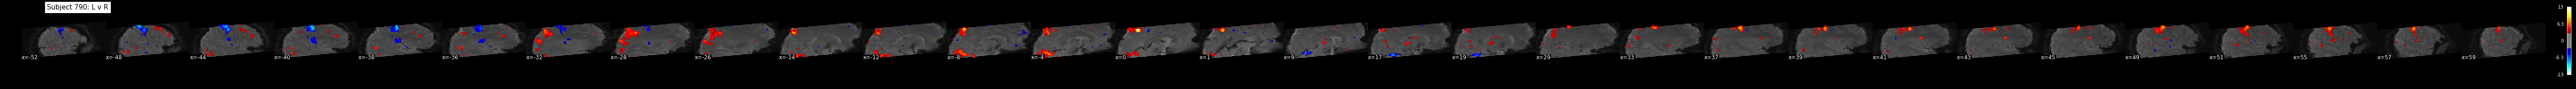

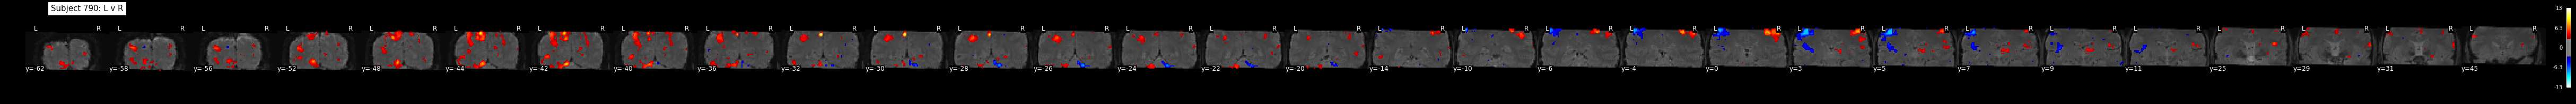

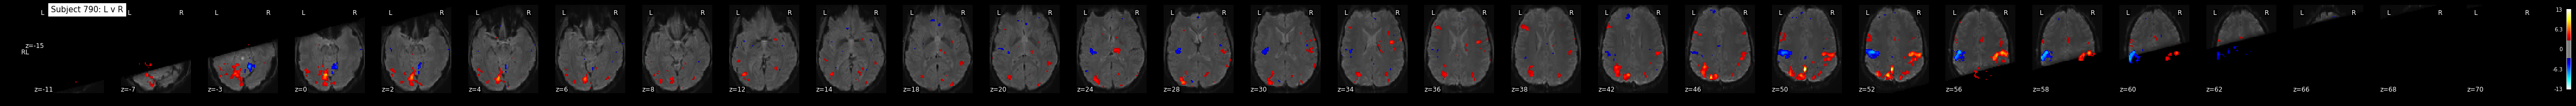

In [37]:
# the uncorrected z-scored estimates using default threshold
plot_stat_map(z_map_790, bg_img=mean_epi_img_790, threshold=3,
              display_mode='x', cut_coords=30, black_bg=True,
              title='Subject 790: L v R')

plot_stat_map(z_map_790, bg_img=mean_epi_img_790, threshold=3,
              display_mode='y', cut_coords=30, black_bg=True,
              title='Subject 790: L v R')

plot_stat_map(z_map_790, bg_img=mean_epi_img_790, threshold=3,
              display_mode='z', cut_coords=30, black_bg=True,
              title='Subject 790: L v R')

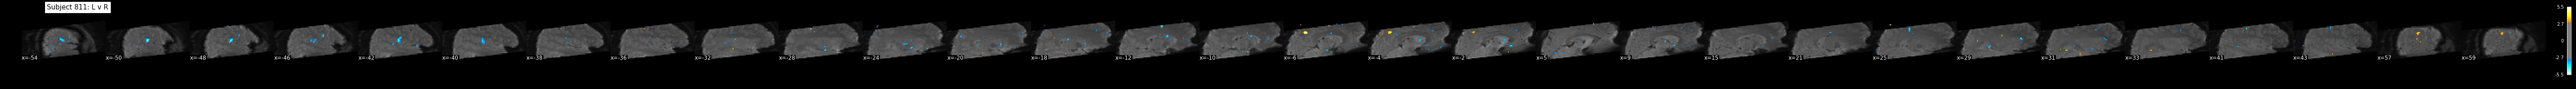

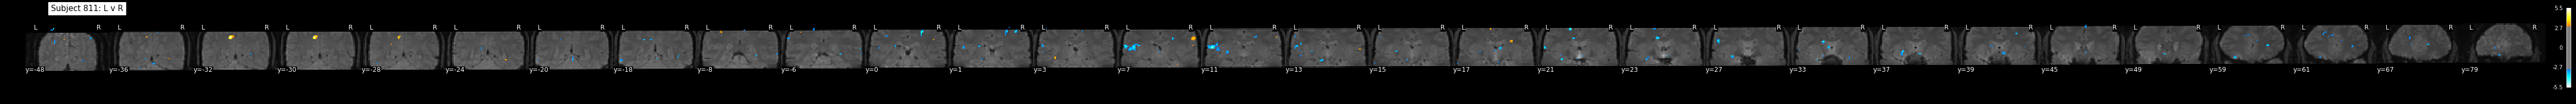

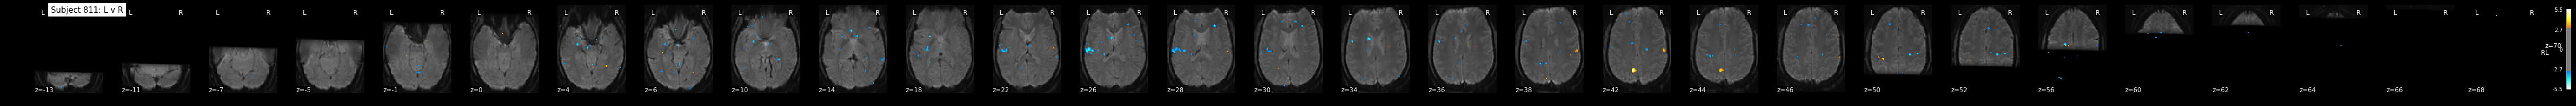

In [38]:
# the uncorrected z-scored estimates using default threshold
plot_stat_map(z_map_811, bg_img=mean_epi_img_811, threshold=3,
              display_mode='x', cut_coords=30, black_bg=True,
              title='Subject 811: L v R')

plot_stat_map(z_map_811, bg_img=mean_epi_img_811, threshold=3,
              display_mode='y', cut_coords=30, black_bg=True,
              title='Subject 811: L v R')

plot_stat_map(z_map_811, bg_img=mean_epi_img_811, threshold=3,
              display_mode='z', cut_coords=30, black_bg=True,
              title='Subject 811: L v R')

In [ ]:
# the uncorrected z-scored estimates using default threshold
plot_stat_map(z_map_813, bg_img=mean_epi_img_813, threshold=3,
              display_mode='x', cut_coords=30, black_bg=True,
              title='Subject 813: L v R')

plot_stat_map(z_map_813, bg_img=mean_epi_img_813, threshold=3,
              display_mode='y', cut_coords=30, black_bg=True,
              title='Subject 813: L v R')

plot_stat_map(z_map_813, bg_img=mean_epi_img_813, threshold=3,
              display_mode='z', cut_coords=30, black_bg=True,
              title='Subject 813: L v R')

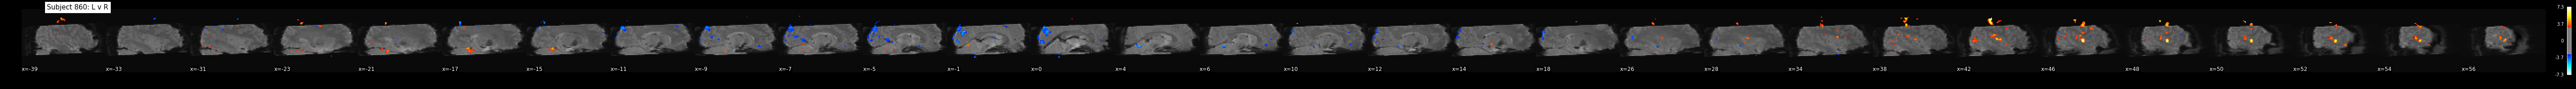

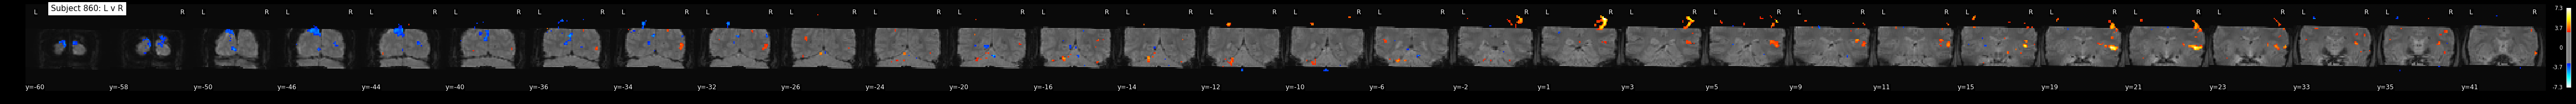

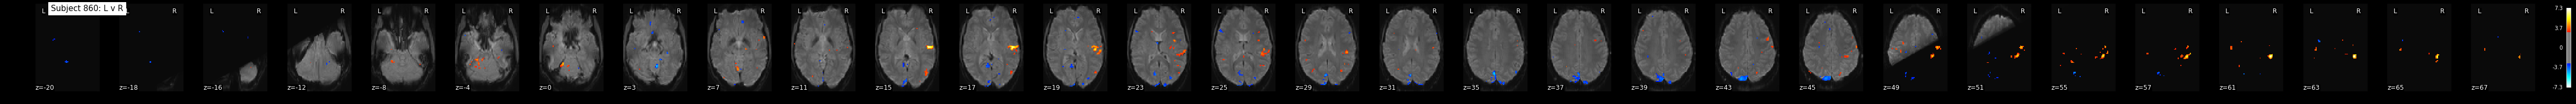

In [39]:
# the uncorrected z-scored estimates using default threshold
plot_stat_map(z_map_860, bg_img=mean_epi_img_860, threshold=3,
              display_mode='x', cut_coords=30, black_bg=True,
              title='Subject 860: L v R')

plot_stat_map(z_map_860, bg_img=mean_epi_img_860, threshold=3,
              display_mode='y', cut_coords=30, black_bg=True,
              title='Subject 860: L v R')

plot_stat_map(z_map_860, bg_img=mean_epi_img_860, threshold=3,
              display_mode='z', cut_coords=30, black_bg=True,
              title='Subject 860: L v R')